<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Преобразование-данных-(форматирование)" data-toc-modified-id="Преобразование-данных-(форматирование)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Преобразование данных (форматирование)</a></span></li><li><span><a href="#Пропущенные-данные" data-toc-modified-id="Пропущенные-данные-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Пропущенные данные</a></span></li></ul></li><li><span><a href="#Моделирование" data-toc-modified-id="Моделирование-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Моделирование</a></span><ul class="toc-item"><li><span><a href="#Базовые-функции" data-toc-modified-id="Базовые-функции-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Базовые функции</a></span></li><li><span><a href="#Обучение-моделей-на-базовых-гиперпараметрах-(&quot;Vanilla-Model&quot;)" data-toc-modified-id="Обучение-моделей-на-базовых-гиперпараметрах-(&quot;Vanilla-Model&quot;)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучение моделей на базовых гиперпараметрах ("Vanilla Model")</a></span></li><li><span><a href="#Расчет-результативности-с-применением-resampling-(опция---SMOTE)" data-toc-modified-id="Расчет-результативности-с-применением-resampling-(опция---SMOTE)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Расчет результативности с применением resampling (опция - SMOTE)</a></span></li><li><span><a href="#Поиск-оптимальных-гиперпараметров-для-град.спуска" data-toc-modified-id="Поиск-оптимальных-гиперпараметров-для-град.спуска-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Поиск оптимальных гиперпараметров для град.спуска</a></span></li><li><span><a href="#Финальная-модель.-Сравнительный-анализ" data-toc-modified-id="Финальная-модель.-Сравнительный-анализ-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Финальная модель. Сравнительный анализ</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

**README FIRST**


- в настоящей работе проведено исследование по построению мультиклассового классификатора с использованием алгоритмов логистической регрессии


- при этом, в качестве исходных данных была взята выборка футболистов электронной игры FIFA19
  - источник данных [здесь](https://www.kaggle.com/karangadiya/fifa19)
  - всего 89 столбцов и около 18 тыс. записей
  
  
- в качестве анализируемого класса была взята позиция футболиста на поле
  - всего - 27 классов
  

- методология:
  - учитывая большое кол-во классов, в целях экономии расчетного времени, выбрана стратегия - One-vs-All
  - т.е. финальная модель содержит 27 отдельных, независимых моделей
  - алгоритм логистической регрессии реализован вручную следующими функциями (в 2.1)
    - `sigmoid(x)` - функция, возвращающая значение сигмоид-функции
    - `binary_prediction(probabilities, threshold=0.5)` - возвращает массив бинарных классов в зависимости от вероятностей
    - `grad_desc(X, y, max_iterations, alpha, initial_weight=None)` - реализует метод градиентного спуска с вызовом сигмоид-функции для ошибок и возвращает массив весов
    - инструкция `y_hat_test = sigmoid(np.dot(X_test, weights))` - рассчитывает прогнозные веса для дальнейшего расчета меток классов


- подготовка данных:
  - Учитывая "scratch"-версию алгоритма, обучение модели проходило с использованием менее трудоемкого варианта Train-test-split вместо кросс-валидации
  - для каждой пары "class A - class Not A" запускалась отдельная модель и отдельный препроцессинг данных
  - для этого реализована функции `one_vs_all_split`: 
    - которая на вход принимает Х и y, а также значение целевого класса
    - преобразует массив y - в массив бинарных метод
    - осуществляет разбивку train-test-split
    - осуществляет масштабирование Х
    - возвращает готовые для моделирования массивы Х и у для обучения и валидации


- модуль SMOTE:
  - в основном все классы - не сбалансированы вследствие их разнообразия и стратегии 1-vs-all
  - поэтому в модели используется метод SMOTE библиотеки imblearn, позволяющий осуществлять resampling для балансировки X_train, y_train


- Оценка прогнозов:
  - в качестве метрики для оценки качества моделей выбраны accuracy score и f1-score
  - при этом вторая метрика является более предпочтительной вследствии слабой сбалансированности классов, когда высокие значение accuracy - мало информативны
  - дополнительно (для иллюстративных целей) реализована функция plot_confusion_matrix, строящая confusion_matrix
  

- Финальная оценка
  - для финальной оценки прогнозы отдельных классов были консолидированы в общий массив и в качестве итоговой метрики проверены совпадения с тестовой (мультиклассовой) выборкой
  - при этом была проверена сходимость метрики с прогнозами, выполненными функциями библиотеки SKLEARN

In [116]:
# 1. Импорт необходимых библиотек и общие настройки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import itertools
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

## Загрузка и подготовка данных

### Загрузка данных

In [190]:
# 2. Загрузка данных

raw_data = pd.read_csv('data.csv')

# выбранные вручную данные для классификационной задачи
X_cols = ['Age','Overall','Wage','Special','Preferred Foot','Weak Foot','Skill Moves', 'Body Type',
         'Height', 'Weight', 'Crossing','Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
         'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration','SprintSpeed', 'Agility', 
         'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
         'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 
          'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

# в качестве класса - взята позиция футболиста на поле
raw_classes = ['Position']

# предварительная подготовка данных
X_raw = raw_data[X_cols]
y_raw = raw_data[raw_classes]

### Преобразование данных (форматирование)

In [191]:
# примечание: 
# здесь я убрал из кода стандартные проверки типа info(), describe()
# а привожу уже решения (модификации данных) на основе внутреннего анализа


# 1. STR -> INT for [wage, height, weight]

wage_int = [int(x[1:-1])  if x!='€0' else 0 for x in X_raw.Wage]
X_raw.drop(columns=['Wage'], axis=1, inplace=True)
X_raw['Wage'] = wage_int


FEET_CM = 30.48
INCH_CM = 2.54
height = []
for h in X_raw.Height:
    if h != np.nan and type(h) == str:
        h1 = h.split("'")
        height.append(int(h1[0])*FEET_CM + int(h1[1])*INCH_CM)
    else:
        height.append(h)
X_raw.drop(columns=['Height'], axis=1, inplace=True)
X_raw['Height'] = height

weight_int = [int(x[:-3])  if type(x)==str else x for x in X_raw.Weight]
X_raw.drop(columns=['Weight'], axis=1, inplace=True)
X_raw['Weight'] = weight_int


# 2. Categorical Vars binning for [Preferred Foot, Body Type]
X_raw = pd.get_dummies(X_raw)

### Пропущенные данные

In [192]:
# 1. Идентификация

for col in X_raw.columns:
    print(col, X_raw[col].isna().sum())
print(y_raw.isna().sum())

# судя по одинаковому кол-ву пропущенных значений (48) в матрице факторов, данные пропуски характерны
# для идентичных индексов. Исходя из малого кол-ва пропусков, предлагаю удалить данные записи.

# для проверки идентичности индексов запустим сбор пропущенных наблюдений по первому предиктору (Weak Foot), а затем 
# повторно проверим пропуски
missing_index = X_raw['Weak Foot'].isna() * X_raw.index
missing_index = np.array(list(set(missing_index) - set([0])))

display(X_raw.drop(index=missing_index, axis=0, inplace=False).isna().sum().sum())
# как показывает результат повторной проверки  - пропущенные данные отсутствуют

# проверим пропуски в векторе-классов с учетом удаления ранее идентифицированных индексов 
# изначальное кол-во пропусков = 60
display(y_raw.drop(index=missing_index, axis=0, inplace=False).isna().sum().sum())

# таким образом остается 12 пропусков, которые также предлагается удалить
missing_index_full = y_raw['Position'].isna() * y_raw.index
missing_index_full = np.array(list(set(missing_index_full) - set([0])))

# 2. Удаление пропусков
X_raw.drop(index=missing_index_full, axis=0, inplace=True)
y_raw.drop(index=missing_index_full, axis=0, inplace=True)

Age 0
Overall 0
Special 0
Weak Foot 48
Skill Moves 48
Crossing 48
Finishing 48
HeadingAccuracy 48
ShortPassing 48
Volleys 48
Dribbling 48
Curve 48
FKAccuracy 48
LongPassing 48
BallControl 48
Acceleration 48
SprintSpeed 48
Agility 48
Reactions 48
Balance 48
ShotPower 48
Jumping 48
Stamina 48
Strength 48
LongShots 48
Aggression 48
Interceptions 48
Positioning 48
Vision 48
Penalties 48
Composure 48
Marking 48
StandingTackle 48
SlidingTackle 48
GKDiving 48
GKHandling 48
GKKicking 48
GKPositioning 48
GKReflexes 48
Wage 0
Height 48
Weight 48
Preferred Foot_Left 0
Preferred Foot_Right 0
Body Type_Akinfenwa 0
Body Type_C. Ronaldo 0
Body Type_Courtois 0
Body Type_Lean 0
Body Type_Messi 0
Body Type_Neymar 0
Body Type_Normal 0
Body Type_PLAYER_BODY_TYPE_25 0
Body Type_Shaqiri 0
Body Type_Stocky 0
Position    60
dtype: int64


0

12

## Моделирование

### Базовые функции

In [193]:
# 1. сигмоид-функция
def sigmoid(x): 
    x = np.array(x)
    return 1/(1 + np.e**(-1*x))

# 2. градиентный спуск
def grad_desc(X, y, max_iterations, alpha, initial_weights=None):
    if initial_weights == None:
        initial_weights = np.ones((X.shape[1],1)).flatten()
    weights = initial_weights
    for iteration in range(max_iterations):
        predictions = sigmoid(np.dot(X,weights))
        error_vector = y - predictions
        gradient = np.dot(X.transpose(),error_vector)
        weights += alpha * gradient
    return weights

# 3. Функция для перевода вероятностей в классы
def binary_prediction(probabilities, threshold=.5):
    classes = []
    for p in probabilities:
        if p >= threshold:
            classes.append(1)
        else:
            classes.append(0)
    return classes



# 5. Функция подготовки данных для перебора классов по стратегии "1-vs-all" c масштабированием признаков
def one_vs_all_split(X,y, class_label, test_weight=0.25, random_state=37, use_smote='no'):
    y_modified = pd.Series([1 if y.Position[i]==class_label else 0 for i in y.index])
    X_train, X_test, y_train, y_test = train_test_split(X, y_modified, 
                                                        test_size=test_weight, random_state=random_state)
    X_train_cols = X_train.columns
    if use_smote == 'yes':
        smote = SMOTE(sampling_strategy='auto', n_jobs=-1)
        X_train, y_train = smote.fit_sample(X_train, y_train)
        
    scaler = MinMaxScaler()
    X_train_scaler = scaler.fit_transform(X_train)
    X_train_scaled = pd.DataFrame(data=X_train_scaler, columns=X_train_cols)
    X_test_scaler = scaler.transform(X_test)
    X_test_scaled = pd.DataFrame(data=X_test_scaler, columns=X_train_cols)
    return X_train_scaled, X_test_scaled, y_train, y_test

# 6. Функция для визуализации confusion matrix
def plot_confusion_matrix(y_pred, y_test, class_label_name):
    cnf_matrix = confusion_matrix(y_pred, y_test)
    plt.imshow(cnf_matrix,  cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix on {class_label_name}')
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    class_names = set(y_test)
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    thresh = cnf_matrix.max() / 2.
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, cnf_matrix[i, j],
                     horizontalalignment="center",
                     color="white" if cnf_matrix[i, j] > thresh else "black")
    plt.colorbar()
    plt.show()

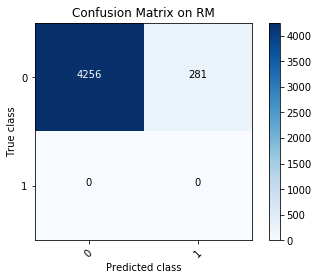

0.9380648005289839

0.0

In [194]:
# тестовый запуск
X_train, X_test, y_train, y_test = one_vs_all_split(X_raw, y_raw, 'RM')

weights = grad_desc(X_train, y_train, 5000, 0.001) # производит fit (обучение) на Train data
y_hat_test = sigmoid(np.dot(X_test, weights)) # рассчитываем target
test_predictions = binary_prediction(y_hat_test)
accuracy_score(y_test, test_predictions)

plot_confusion_matrix(test_predictions, y_test, 'RM')

display(accuracy_score(y_test, test_predictions))
display(f1_score(y_test, test_predictions))

- Как видно из значений accuracy_score и f1_score, модель характеризуется высоким значением accuracy, что связано с большим весом Negative-class, но при этом имеется относительно высокое значение FP  
- как итог, значение f1_score - близко к нулю, что говорит о необходимости возможного resampling
- возможно, такие результаты связаны с особенности выбранного класса ('RM'), поэтому в следующем разделе будет запущены модели по всем имеющимся классам

### Обучение моделей на базовых гиперпараметрах ("Vanilla Model")

In [197]:
# cформируем сводный словарь позиций, куда в дальнейшем будем складывать результаты
player_labels = set(y_raw['Position'])
max_iter = 5000
alpha = 1e-7
player_label_list, acc_list, f1_list = [], [], []


# запуск цикла по бинарным классификаторам
for player in player_labels:
    X_train, X_test, y_train, y_test = one_vs_all_split(X_raw, y_raw, player) # подготовка данных
    print(f'{player} start calc ...')
    weights = grad_desc(X_train, y_train, max_iter, alpha) # обучение модели
    y_hat_test = sigmoid(np.dot(X_test, weights)) # расчет вероятностей
    test_predictions = binary_prediction(y_hat_test) # прогноз классов
    player_label_list.append(player)
    acc_list.append(accuracy_score(y_test, test_predictions))
    f1_list.append(f1_score(y_test, test_predictions))
    print('..done!')

GK start calc ...
..done!
LM start calc ...
..done!
RCB start calc ...
..done!
CF start calc ...
..done!
CAM start calc ...
..done!
RCM start calc ...
..done!
CDM start calc ...
..done!
CB start calc ...
..done!
RB start calc ...
..done!
LAM start calc ...
..done!
RW start calc ...
..done!
ST start calc ...
..done!
RAM start calc ...
..done!
LCB start calc ...
..done!
LW start calc ...
..done!
RM start calc ...
..done!
LCM start calc ...
..done!
RDM start calc ...
..done!
LDM start calc ...
..done!
LWB start calc ...
..done!
RS start calc ...
..done!
CM start calc ...
..done!
LB start calc ...
..done!
RWB start calc ...
..done!
RF start calc ...
..done!
LS start calc ...
..done!
LF start calc ...
..done!


In [198]:
results = pd.DataFrame([])
results['Player Type'] = player_label_list
results['Accuracy'] = acc_list
results['F1-score'] = f1_list
results.describe()

,Accuracy,F1-score
count,27.000000,27.000000
mean,0.957126,0.036934
std,0.041695,0.191917
min,0.846815,0.000000
25%,0.930791,0.000000
50%,0.972669,0.000000
75%,0.991624,0.000000
max,0.999339,0.997230


- как и в предыдущем прогоне модели, данная модель показывает экстремально низкие значения f1_score (в среднем около 4%, поэтому разумным решением является активация опции `use_smote="yes"`

### Расчет результативности с применением resampling (опция - SMOTE)

In [199]:
acc_list_wResampling, f1_list_wResampling = [], []

# запуск цикла по бинарным классификаторам c опцией use_smote='yes'
for player in player_labels:
    X_train, X_test, y_train, y_test = one_vs_all_split(X_raw, y_raw, player, use_smote='yes')
    print(f'{player} start calc ...')
    weights = grad_desc(X_train, y_train, max_iter, alpha)
    y_hat_test = sigmoid(np.dot(X_test, weights))
    test_predictions = binary_prediction(y_hat_test)
    acc_list_wResampling.append(accuracy_score(y_test, test_predictions))
    f1_list_wResampling.append(f1_score(y_test, test_predictions))
    print('..done!')

results['Accuracy_resampling'] = acc_list_wResampling
results['F1-score_resampling'] = f1_list_wResampling
results.describe()

GK start calc ...
..done!
LM start calc ...
..done!
RCB start calc ...
..done!
CF start calc ...
..done!
CAM start calc ...
..done!
RCM start calc ...
..done!
CDM start calc ...
..done!
CB start calc ...
..done!
RB start calc ...
..done!
LAM start calc ...
..done!
RW start calc ...
..done!
ST start calc ...
..done!
RAM start calc ...
..done!
LCB start calc ...
..done!
LW start calc ...
..done!
RM start calc ...
..done!
LCM start calc ...
..done!
RDM start calc ...
..done!
LDM start calc ...
..done!
LWB start calc ...
..done!
RS start calc ...
..done!
CM start calc ...
..done!
LB start calc ...
..done!
RWB start calc ...
..done!
RF start calc ...
..done!
LS start calc ...
..done!
LF start calc ...
..done!


,Accuracy,F1-score,Accuracy_resampling,F1-score_resampling
count,27.000000,27.000000,27.000000,27.000000
mean,0.957126,0.036934,0.632936,0.148340
std,0.041695,0.191917,0.123380,0.208543
min,0.846815,0.000000,0.438395,0.001474
25%,0.930791,0.000000,0.517523,0.039504
50%,0.972669,0.000000,0.634560,0.059057
75%,0.991624,0.000000,0.704981,0.165049
max,0.999339,0.997230,1.000000,1.000000


- результаты существенно поменялись
- так, f1_score - вырос с 0,04 до 0.15
- вместе с тем значительно упал показатель accuracy_score: с 0,96 до 0,63
- в следующем разделе будет произведен поиск оптимальных гиперпараметров алгоритма градиентного спуска (alpha и максимальное кол-во итераций)

### Поиск оптимальных гиперпараметров для град.спуска

In [200]:
# !ВНИМАНИЕ! - запуск данной ячейки может занять до 30 минут
alpha_levels = [1e-1, 1e-3, 1e-5, 1e-9, 1e-12]
accuracy_levels = dict()
f1_levels = dict()


for alpha in alpha_levels:
    acc_list, f1_list = [], []
    for player in player_labels:
        X_train, X_test, y_train, y_test = one_vs_all_split(X_raw, y_raw, player, use_smote='yes')
        weights = grad_desc(X_train, y_train, max_iter, alpha)
        y_hat_test = sigmoid(np.dot(X_test, weights))
        test_predictions = binary_prediction(y_hat_test)
        acc_list.append(accuracy_score(y_test, test_predictions))
        f1_list.append(f1_score(y_test, test_predictions))
    accuracy_levels[alpha] = np.mean(acc_list)
    f1_levels[alpha] = np.mean(f1_list)
    print(f'for {alpha} average accuracy is {np.mean(acc_list)}, avg f1 is {np.mean(f1_list)}')

for 0.1 average accuracy is 0.7663899297137119, avg f1 is 0.23235108473102123
for 0.001 average accuracy is 0.8055575963885419, avg f1 is 0.24386264925390205
for 1e-05 average accuracy is 0.8526845117102998, avg f1 is 0.26512139171530624
for 1e-09 average accuracy is 0.037037037037037035, avg f1 is 0.06919367496066114
for 1e-12 average accuracy is 0.037037037037037035, avg f1 is 0.06919367496066114


- из результатов выше видно, что некоторый оптимимум достигается при alpha=0.00001
- в следующей ячейки необходимо понять, какое кол-во итераций оптимально с т.з. результата и времени

In [207]:
# !ВНИМАНИЕ! - запуск данной ячейки может занять до 1 часа
best_alpha = 1e-5
max_iter_list = [1000, 5000, 30000]

accuracy_levels = dict()
f1_levels = dict()


for max_iter in max_iter_list:
    acc_list, f1_list = [], []
    for player in player_labels:
        X_train, X_test, y_train, y_test = one_vs_all_split(X_raw, y_raw, player, use_smote='yes')
        weights = grad_desc(X_train, y_train, max_iter, best_alpha)
        y_hat_test = sigmoid(np.dot(X_test, weights))
        test_predictions = binary_prediction(y_hat_test)
        acc_list.append(accuracy_score(y_test, test_predictions))
        f1_list.append(f1_score(y_test, test_predictions))
    accuracy_levels[alpha] = np.mean(acc_list)
    f1_levels[alpha] = np.mean(f1_list)
    print(f'for {max_iter} average accuracy is {np.mean(acc_list)}, avg f1 is {np.mean(f1_list)}')

for 1000 average accuracy is 0.8231822300590208, avg f1 is 0.2422069046883657
for 5000 average accuracy is 0.8528151250214286, avg f1 is 0.2652215418321641
for 30000 average accuracy is 0.8689948489375422, avg f1 is 0.2767035967130716


- как видно, увеличение кол-ва итераций улучшает качество прогнозов, однако такой рост замедляется и вследствие низкой скорости scratch-версии алгоритма, предлагается остановиться на варианте max_iter = 10 000
- следует также помнить, что все метрики были основаны на бинарных моделях
- в следующем разделе будет реализована функция подсчета accuracy уже на сводных мульти-классовых прогнозах

### Финальная модель. Сравнительный анализ

In [244]:
# OPTIMAL PARAMS for scratch-model
alpha = 1e-5
max_iter = 10000
player_labels = set(y_raw['Position'])

# Подготовка данных (до запуска бинарных классификаторов)
X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.25, random_state=37)
X_train_cols = X_train.columns

final_forecast_scratch = pd.Series(np.zeros(len(y_test)))
smote = SMOTE(sampling_strategy='auto', n_jobs=-1)
X_train, y_train = smote.fit_sample(X_train, y_train)
y_train = pd.Series(y_train)

scaler = MinMaxScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(data=X_train_scaler, columns=X_train_cols)
X_test_scaler = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(data=X_test_scaler, columns=X_train_cols)

# запуск цикла по бинарным классификаторам - уже без использования функции one_vs_all
for player in player_labels:
    print(f'{player} start calc ...')
    # подготовка бинарных таргетов
    y_modified_train = pd.Series([1 if y_train[i]==player else 0 for i in y_train.index])
    # град.спуск - обучение
    weights = grad_desc(X_train_scaled, y_modified_train, max_iter, alpha)
    y_hat_test = sigmoid(np.dot(X_test_scaled, weights))
    # прогноз - на тестовой выборке
    test_predictions = binary_prediction(y_hat_test)
    for i in range(len(test_predictions)):
        if test_predictions[i] == 1:
            final_forecast_scratch[i] = player
    print('..done!')

GK start calc ...
..done!
LM start calc ...
..done!
RCB start calc ...
..done!
CF start calc ...
..done!
CAM start calc ...
..done!
RCM start calc ...
..done!
CDM start calc ...
..done!
CB start calc ...
..done!
RB start calc ...
..done!
LAM start calc ...
..done!
RW start calc ...
..done!
ST start calc ...
..done!
RAM start calc ...
..done!
LCB start calc ...
..done!
LW start calc ...
..done!
RM start calc ...
..done!
LCM start calc ...
..done!
RDM start calc ...
..done!
LDM start calc ...
..done!
LWB start calc ...
..done!
RS start calc ...
..done!
CM start calc ...
..done!
LB start calc ...
..done!
RWB start calc ...
..done!
RF start calc ...
..done!
LS start calc ...
..done!
LF start calc ...
..done!


In [257]:
final_forecast_scratch = pd.Series(final_forecast_scratch)

total = len(y_test)
counter = 0
for fact, predict in zip(y_test.Position, final_forecast_scratch):
    if fact == predict: counter+=1


print(f'в итоге верно предсказанных позиций: {100*round(counter/total, 1)}%')

в итоге верно предсказанных позиций: 20.0%


In [258]:
# запуск цикла по бинарным классификаторам - c использованием библиотеки SKLEARN
final_forecast_sklearn = pd.Series(np.zeros(len(y_test)))
for player in player_labels:
    print(f'{player} start calc ...')
    # подготовка бинарных таргетов
    y_modified_train = pd.Series([1 if y_train[i]==player else 0 for i in y_train.index])
    # модель SKLEARN
    logreg = LogisticRegression(fit_intercept=False)
    logreg.fit(X_train_scaled, y_modified_train)
    # прогноз - на тестовой выборке
    test_predictions = logreg.predict(X_test_scaled)
    for i in range(len(test_predictions)):
        if test_predictions[i] == 1:
            final_forecast_sklearn[i] = player
    print('..done!')

final_forecast_sklearn = pd.Series(final_forecast_sklearn)

total = len(y_test)
counter = 0
for fact, predict in zip(y_test.Position, final_forecast_sklearn):
    if fact == predict: counter+=1

print(f'в итоге верно предсказанных позиций: {100*round(counter/total, 1)}%')

GK start calc ...
..done!
LM start calc ...
..done!
RCB start calc ...
..done!
CF start calc ...
..done!
CAM start calc ...
..done!
RCM start calc ...
..done!
CDM start calc ...
..done!
CB start calc ...
..done!
RB start calc ...
..done!
LAM start calc ...
..done!
RW start calc ...
..done!
ST start calc ...
..done!
RAM start calc ...
..done!
LCB start calc ...
..done!
LW start calc ...
..done!
RM start calc ...
..done!
LCM start calc ...
..done!
RDM start calc ...
..done!
LDM start calc ...
..done!
LWB start calc ...
..done!
RS start calc ...
..done!
CM start calc ...
..done!
LB start calc ...
..done!
RWB start calc ...
..done!
RF start calc ...
..done!
LS start calc ...
..done!
LF start calc ...
..done!
в итоге верно предсказанных позиций: 20.0%


## Выводы

- scratch-версия модели Логистической регрессии показала свою сходимость с аналогом модели, встроенной в библиотеку SKLEARN
- были найдены оптимальные (с учетом разумного времени запуска кода) параметры градиентного спуска
- вместе с тем, общая точность прогноза (20%) далека от понятия качественной модели
- с одной стороны, это может быть связано с исходными данными, в частности в данной работе не анализировалось то, насколько действительно некоторые позиции футболистов могут быть качественно отделены по признакам
- другими словами, необходим детальный анализ типа SIZE EFFECT с тестированием соответствующих гипотез
- также, возможно, в данной ситуации, альтернативные алгоритмы, такие как Байесовский классификатор, SVM или DecisionTree могут быть использованы более эффективно (что выходит за рамки настоящей работы)


В целом, могу сделать следующий вывод: бинарный классификатор Логистическая регрессия с использованием стратегии "Один-против-Всех" в случае несбалансированных классов недостаточно хорошо подходит для построения прогнозов